## 공공데이터 상권정보 분석해 보기

### 필요한 라이브러리 불러오기

In [227]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 시각화를 위한 폰트 설정

In [228]:
# Window이 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

In [229]:
from IPython.display import set_matplotlib_formats
# 폰트가 선명하게 보이기 위해
set_matplotlib_formats('retina')

### 데이터 로드하기
+ 판다스의 데이터 로드는 read_csv를 사용
+ 데이터를 로드하고 df라는 변수로 지정
+ shape를 통해 데이터의 갯수를 찍음

In [20]:
df = pd.read_csv('C:/Data/상가.xls',low_memory=False)
df.shape

(91335, 39)

### 1.4 데이터 미리보기

In [21]:
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344


In [22]:
df.tail(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
91334,16109073,천안김안과천안역본점의원,NaN,S,의료,S01,병원,S01B13,안과의원,Q86201,...,4413110700102660017016314,김안과,충청남도 천안시 동남구 중앙로 92,330952.0,31127.0,NaN,NaN,NaN,127.152651,36.80664


### 데이터 요약하기

In [23]:
# info로 데이터 요약
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

In [24]:
df.type

AttributeError: 'DataFrame' object has no attribute 'type'

In [ ]:
df.dtypes

### 결측치

In [25]:
df.isnull()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
3,False,False,True,False,False,False,False,False,False,True,...,False,True,False,False,False,True,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91330,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,True,True,False,False
91331,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
91332,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
91333,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,True,True,False,False


In [26]:
null_count = df.isnull().sum()

<AxesSubplot:>

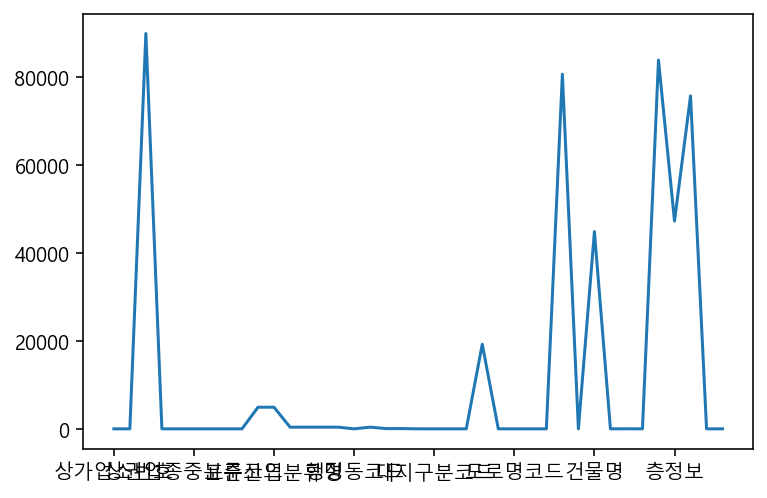

In [27]:
null_count.plot()

<AxesSubplot:>

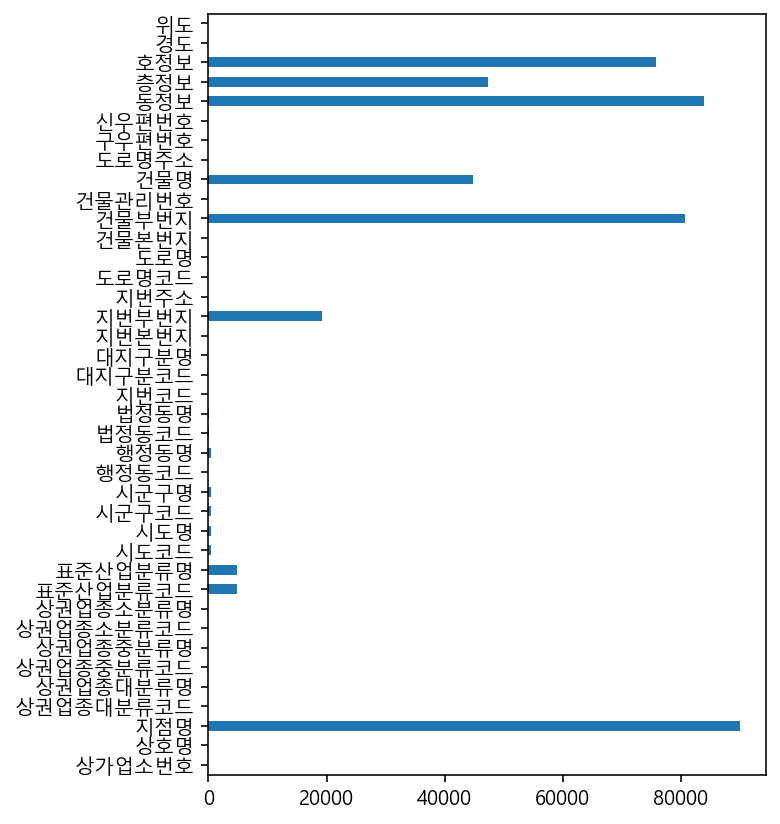

In [28]:
null_count.plot.barh(figsize=(5,7))

In [29]:
df_null_count = null_count.reset_index()
df_null_count.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


### 컬럼명 변경하기

In [30]:
df_null_count.columns = ["컬럼명","결측치수"]
df_null_count.head()

,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


### 정렬하기

In [31]:
df_null_count_top = df_null_count.sort_values(by="결측치수", ascending=False).head(10)
df_null_count_top 

,컬럼명,결측치수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75784
35,층정보,47291
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922
11,시도코드,379


### 특정 컬럼만 불러오기

In [32]:
df["지점명"].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    수지점
Name: 지점명, dtype: object

In [33]:
drop_columns = df_null_count_top["컬럼명"].tolist()
drop_columns

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드']

### 제거하기

In [34]:
df = df.drop(drop_columns,axis=1)

In [35]:
df.info

<bound method DataFrame.info of          상가업소번호           상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  상권업종중분류명  \
0      19956873        하나산부인과         S       의료       S01        병원   
1      20024149      타워광명내과의원         S       의료       S01        병원   
2      20152277     조정현신경외과의원         S       의료       S01        병원   
3      20350610      한귀원정신과의원         S       의료       S01        병원   
4      20364049     더블유스토어수지점         S       의료       S02    약국/한약방   
...         ...           ...       ...      ...       ...       ...   
91330  16196725         온누리약국         S       의료       S02    약국/한약방   
91331  16192180            리원         S       의료       S07  의료관련서비스업   
91332  16127538       참좋은요양병원         S       의료       S01        병원   
91333  16108681       경희중앙한의원         S       의료       S01        병원   
91334  16109073  천안김안과천안역본점의원         S       의료       S01        병원   

      상권업종소분류코드 상권업종소분류명    시도명    시군구코드  ...                     지번주소  \
0        S01B10     산부인과    경

### 기초 통계값 보기
#### 기초 통계 수치

In [36]:
df["위도"].dtypes

dtype('float64')

In [37]:
df["위도"].mean()

36.62471119236673

In [38]:
df["위도"].median()

37.23465231770329

In [39]:
df["위도"].max()

38.499658570559795

In [40]:
df["위도"].min()

33.2192896688307

In [41]:
df["위도"].count()

91335

#### 기초 통계값 요약

In [42]:
df["위도"].describe()

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [43]:
df[["위도","경도"]].describe()

,위도,경도
count,91335.000000,91335.000000
mean,36.624711,127.487524
std,1.041361,0.842877
min,33.219290,124.717632
25%,35.811830,126.914297
50%,37.234652,127.084550
75%,37.507463,128.108919
max,38.499659,130.909912


In [44]:
df.describe(include="object")

,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,건물관리번호,도로명주소
count,91335,91335,91335,91335,91335,91335,91335,90956,90956,90956,91280,91335,91335,91335,91335,91335
unique,56910,1,1,5,5,34,34,17,228,2791,2822,2,53118,16610,54142,54031
top,리원,S,의료,S01,병원,S02A01,약국,경기도,서구,중앙동,중동,대지,서울특별시 동대문구 제기동 965-1,서울특별시 강남구 강남대로,1123010300109650001031604,서울특별시 동대문구 약령중앙로8길 10
freq,152,91335,91335,60774,60774,18964,18964,21374,3165,1856,874,91213,198,326,198,198


#### 중복제거한 값 보기

In [45]:
df["상권업종대분류명"].unique()

array(['의료'], dtype=object)

In [46]:
df["상권업종대분류명"].nunique()

1

#### 그룹화된 요약값 보기

In [47]:
city = df["시도명"].value_counts()

In [48]:
# normalize = True 를 통해 비율로 나타내기
city_normalize = df["시도명"].value_counts(normalize=True)

<AxesSubplot:>

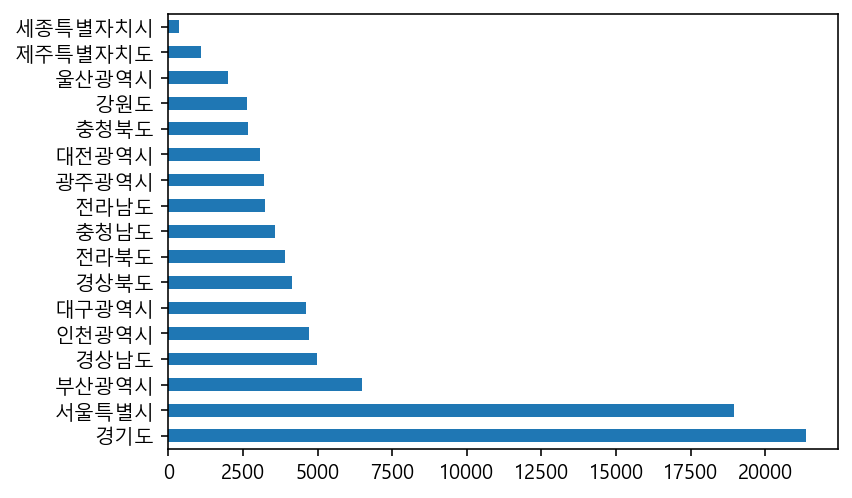

In [49]:
city.plot.barh()

<AxesSubplot:ylabel='시도명'>

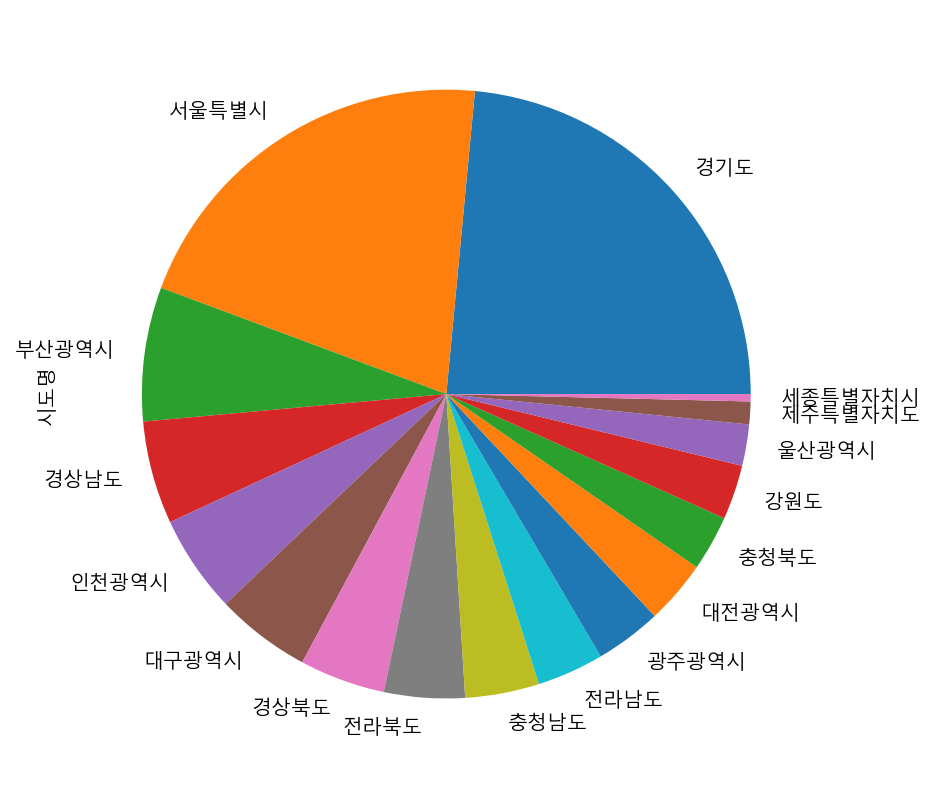

In [50]:
city.plot.pie(figsize= (7,7))

<AxesSubplot:xlabel='시도명', ylabel='count'>

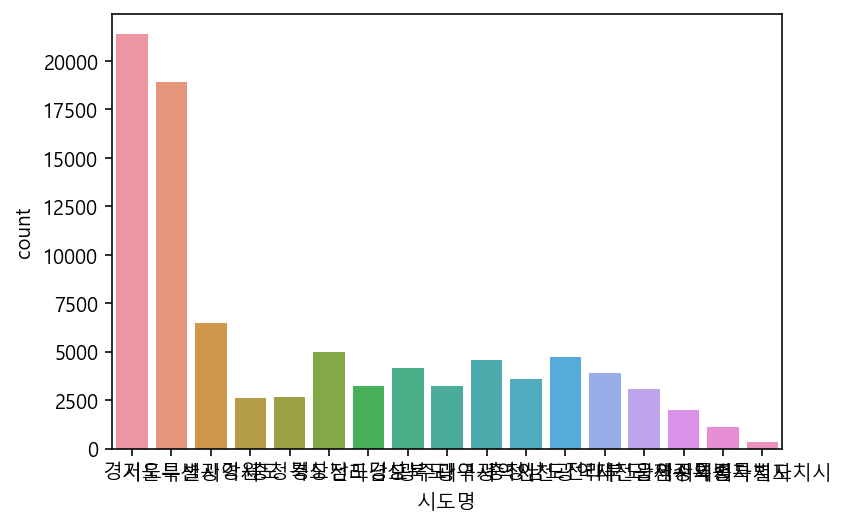

In [51]:
sns.countplot(data=df,x="시도명")

In [52]:
df["상권업종대분류명"].value_counts()

의료    91335
Name: 상권업종대분류명, dtype: int64

In [53]:
c = df["상권업종중분류명"].value_counts()

In [54]:
n = df["상권업종중분류명"].value_counts(normalize=True)

<AxesSubplot:>

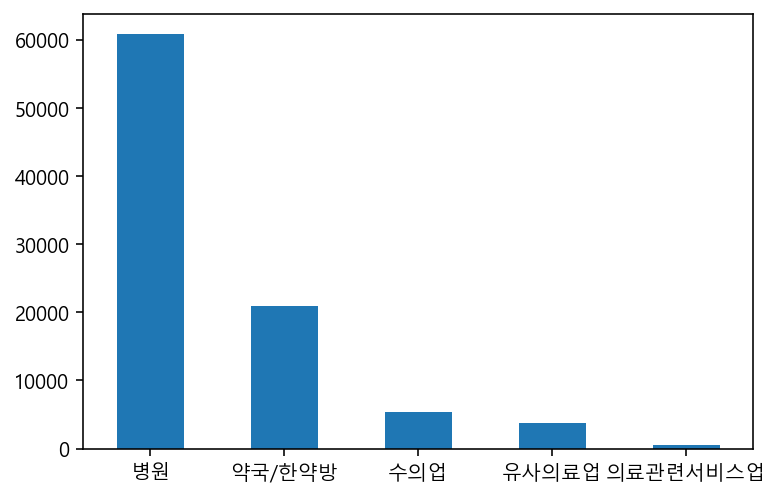

In [55]:
c.plot.bar(rot=0)

<AxesSubplot:ylabel='상권업종중분류명'>

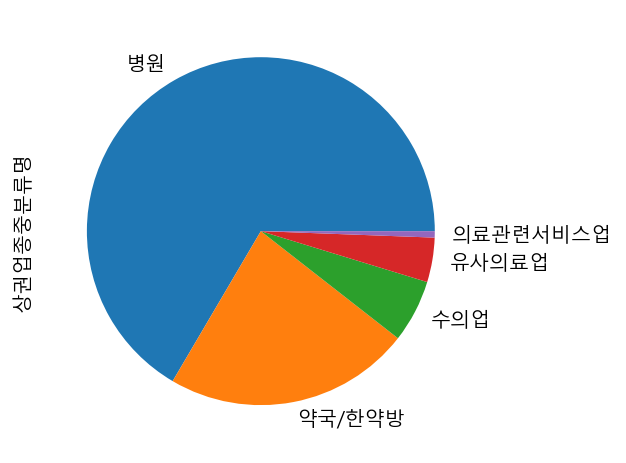

In [56]:
c.plot.pie()

In [57]:
c = df["상권업종소분류명"].value_counts()

<AxesSubplot:>

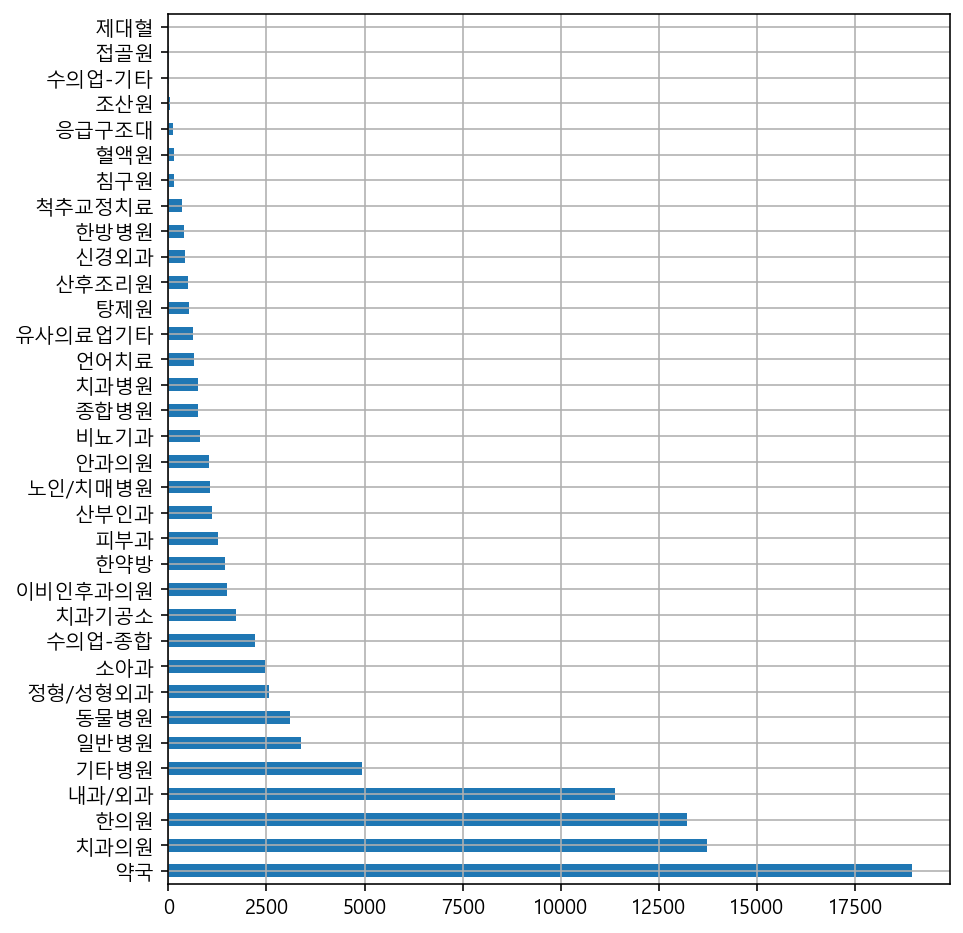

In [58]:
c.plot.barh(figsize=(7,8),grid=True )

### 데이터 색인하기

In [59]:
df_medical = df[df["상권업종중분류명"] == "약국/한약방"].copy()
df_medical.head(1)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
4,20364049,더블유스토어수지점,S,의료,S02,약국/한약방,S02A01,약국,경기도,41465.0,...,경기도 용인시 수지구 풍덕천동 712-2,414653205024,경기도 용인시 수지구 문정로,32,4146510100107120002026238,경기도 용인시 수지구 문정로 32,448170.0,16837.0,127.095522,37.323528


In [60]:
m = df["상권업종대분류명"] == "의료"
df.loc[m, "상권업종중분류명"].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [61]:
df_medi = df[df["상권업종중분류명"] == "유사의료업"]

In [62]:
df["상호명"].value_counts().head(10)

리원       152
온누리약국    149
경희한의원    141
우리약국     119
중앙약국     111
전자담배      98
조은약국      95
건강약국      87
제일약국      79
사랑약국      73
Name: 상호명, dtype: int64

In [63]:
df_medi["상호명"].value_counts().head(10)

리원          32
고려수지침       22
대한적십자사      17
헌혈의집        12
수치과기공소      10
고려수지침학회     10
제일치과기공소      9
미소치과기공소      8
이사랑치과기공소     8
스마일치과기공소     8
Name: 상호명, dtype: int64

#### 여러 조건으로 색인하기

In [64]:
df_seoul_drug = df[(df["상권업종소분류명"] == "약국") & (df["시도명"] == "서울특별시")]
df_seoul_drug
print(df_seoul_drug.shape)
df_seoul_drug.head(1)

(3579, 29)


,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
33,20816709,이즈타워약,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11680.0,...,서울특별시 강남구 역삼동 821,116803122010,서울특별시 강남구 테헤란로,101,1168010100108210001000001,서울특별시 강남구 테헤란로 101,135080.0,6134.0,127.028023,37.498656


#### 구별로 보기

In [65]:
c = df_seoul_drug["시군구명"].value_counts()
c.head()

강남구     374
동대문구    261
광진구     212
서초구     191
송파구     188
Name: 시군구명, dtype: int64

In [66]:
n = df_seoul_drug["시군구명"].value_counts(normalize=True)
n.head()

강남구     0.104498
동대문구    0.072925
광진구     0.059234
서초구     0.053367
송파구     0.052529
Name: 시군구명, dtype: float64

<AxesSubplot:>

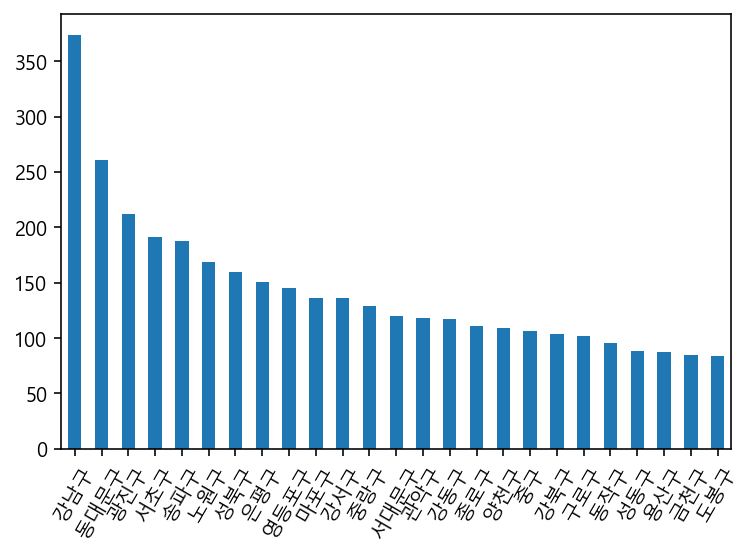

In [67]:
c.plot.bar(rot=60)

In [68]:
df_seoul_hospital = df[(df["상권업종소분류명"] == "종합병원") &
                       (df["시도명"] == "서울특별시")].copy()

In [69]:
df_seoul_hospital["시군구명"].value_counts()

강남구     15
영등포구     8
서초구      6
광진구      6
송파구      5
강동구      5
중구       5
도봉구      4
강북구      4
서대문구     4
양천구      4
성북구      3
종로구      2
관악구      2
동대문구     2
금천구      2
성동구      2
구로구      2
강서구      2
노원구      2
중랑구      2
마포구      1
은평구      1
동작구      1
용산구      1
Name: 시군구명, dtype: int64

#### 텍스트 데이터 색인하기

In [70]:
df_seoul_hospital["상호명"].str.contains("종합병원")

305      False
353      False
385      False
1917     False
2461     False
         ...  
71991    False
76508    False
90492    False
90581    False
90788    False
Name: 상호명, Length: 91, dtype: bool

In [71]:
df_seoul_hospital.loc[~df_seoul_hospital["상호명"].str.contains("종합병원"), "상호명"].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '평화드림여의도성모병원의료기매장', '한양', '백산의료재단친구병원',
       '서울보훈병원', '서울성모병원장례식장꽃배달', '서울대학교병원', '알콜중독및정신질환상담소',
       '강남성모병원장례식장꽃배달', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '원자력병원장례식장', '국민의원', '고려대학교구로병원', '학교법인일송학원',
       '삼성의료원장례식장', '희명스포츠의학센터인공신장실', '연세대학교의과대학강남세브란스', '국립정신병원',
       '코아클리닉', '수서제일의원', '사랑의의원', '한국전력공사부속한일병원', '신촌연세병원', '창동제일의원',
       '영동세브란스병원', '제일성심의원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울이의원',
       '서울대학교병원비상계획외래', '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '독일의원',
       '서울연합의원', '우신향병원', '동부제일병원', '아산재단금강병원', '명곡안연구소', '아산재단서울중앙병원',
       '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원', '한국건강관리협회서울특',
       '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', '실로암의원', 'Y&T성모마취과', '광진성모의원',
       '서울현대의원', '이노신경과의원', '송정훼밀리의원', '서울중앙의원', '영남의료재단', '인제대학교서울백병원',
       '한국필의료재단', '세브란스의원', '가톨릭대학교성바오로병원장례식장', '서울연세의원', '사랑의병원',
       '성삼의료재단미즈메디병원', '씨엠충무병원', '성신의원', '원진재단부설녹색병원', '송파제일의원',
       '카톨릭성모의원', '한양성심의원', '관악

In [72]:
df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("꽃배달")]

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
2803,20895655,서울성모병원장례식장꽃배달,S,의료,S01,병원,S01B01,종합병원,서울특별시,11650.0,...,서울특별시 서초구 반포동 551,116504163330,서울특별시 서초구 사평대로28길,55,1165010700105510000017194,서울특별시 서초구 사평대로28길 55,137040.0,6578.0,127.000682,37.498257
4644,22020310,강남성모병원장례식장꽃배달,S,의료,S01,병원,S01B01,종합병원,서울특별시,11650.0,...,서울특별시 서초구 반포동 547-6,116504163242,서울특별시 서초구 반포대로39길,56,1165010700105470006016762,서울특별시 서초구 반포대로39길 56-24,137040.0,6578.0,127.001756,37.499095


In [73]:
df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("의료기")]

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
1917,23210677,평화드림여의도성모병원의료기매장,S,의료,S01,병원,S01B01,종합병원,서울특별시,11560.0,...,서울특별시 영등포구 여의도동 62,115603118001,서울특별시 영등포구 63로,10,1156011000100620000031477,서울특별시 영등포구 63로 10,150713.0,7345.0,126.936693,37.518296


In [74]:
drop_row = df_seoul_hospital[
    df_seoul_hospital["상호명"].str.contains("꽃배달|의료기|장례식장|상담소|어린이집")].index
drop_row = drop_row.tolist()
drop_row

[1917, 2803, 4431, 4644, 7938, 10283, 47008, 60645, 70177]

In [75]:
drop_row2 = df_seoul_hospital[
    df_seoul_hospital["상호명"].str.endswith("의원")].index
drop_row2 = drop_row2.tolist()
drop_row2

[8479,
 12854,
 13715,
 14966,
 16091,
 18047,
 20200,
 20415,
 30706,
 32889,
 34459,
 34720,
 35696,
 37251,
 45120,
 49626,
 51575,
 55133,
 56320,
 56404,
 56688,
 57551,
 62113,
 76508]

In [76]:
drop_row = drop_row + drop_row2
len(drop_row)

33

In [77]:
print(df_seoul_hospital.shape)
df_seoul_hospital = df_seoul_hospital.drop(drop_row,axis=0)
print(df_seoul_hospital.shape)

(91, 29)
(58, 29)


<AxesSubplot:>

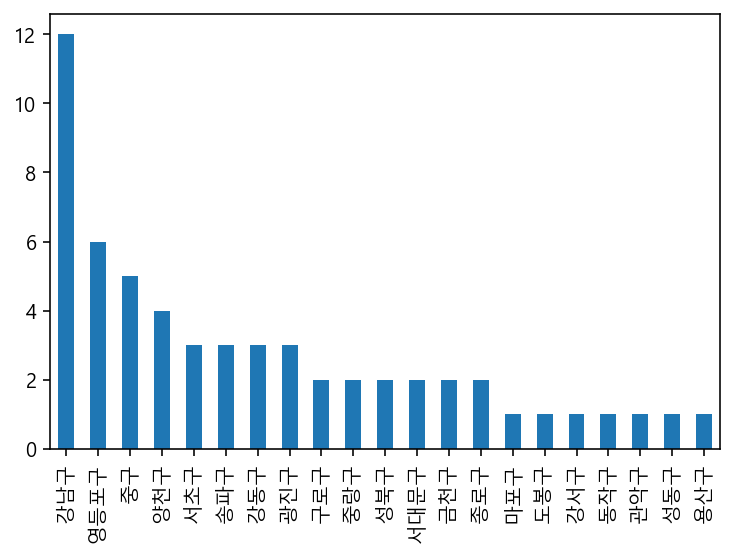

In [78]:
df_seoul_hospital["시군구명"].value_counts().plot.bar()

<AxesSubplot:xlabel='시군구명', ylabel='count'>

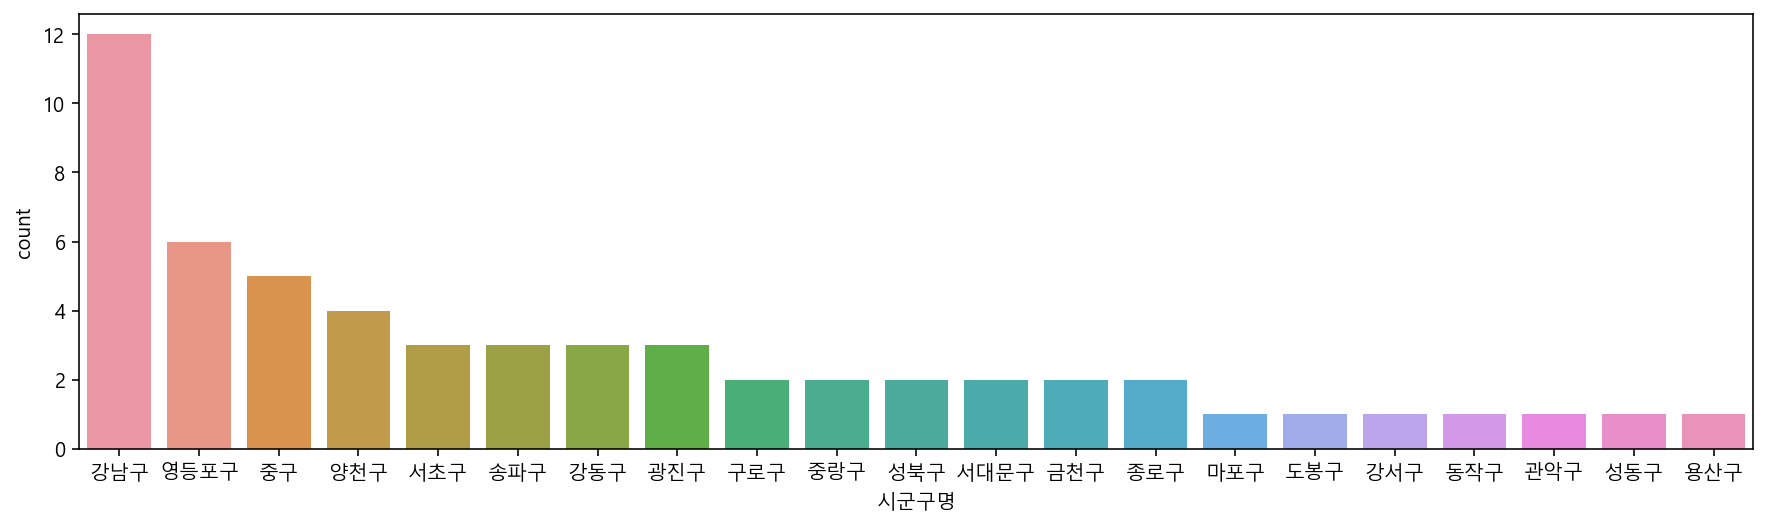

In [79]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_seoul_hospital, x="시군구명",
             order=df_seoul_hospital["시군구명"].value_counts().index)

In [80]:
df_seoul_hospital["상호명"].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '한양', '백산의료재단친구병원', '서울보훈병원',
       '서울대학교병원', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '고려대학교구로병원', '학교법인일송학원', '희명스포츠의학센터인공신장실',
       '연세대학교의과대학강남세브란스', '국립정신병원', '코아클리닉', '한국전력공사부속한일병원', '신촌연세병원',
       '영동세브란스병원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울대학교병원비상계획외래',
       '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '우신향병원', '동부제일병원', '아산재단금강병원',
       '명곡안연구소', '아산재단서울중앙병원', '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원',
       '한국건강관리협회서울특', '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', 'Y&T성모마취과',
       '영남의료재단', '인제대학교서울백병원', '한국필의료재단', '사랑의병원', '성삼의료재단미즈메디병원',
       '씨엠충무병원', '원진재단부설녹색병원', '강남센트럴병원', '우리들병원', '건국대학교병원', '서울적십자병원',
       '서울성모병원응급의료센터', '가톨릭대학교여의도성모병원', '씨엠병원'], dtype=object)

#### 특정 지역만보기

In [81]:
df_seoul = df[df["시도명"] == "서울특별시"].copy()
df_seoul.shape

(18943, 29)

<AxesSubplot:>

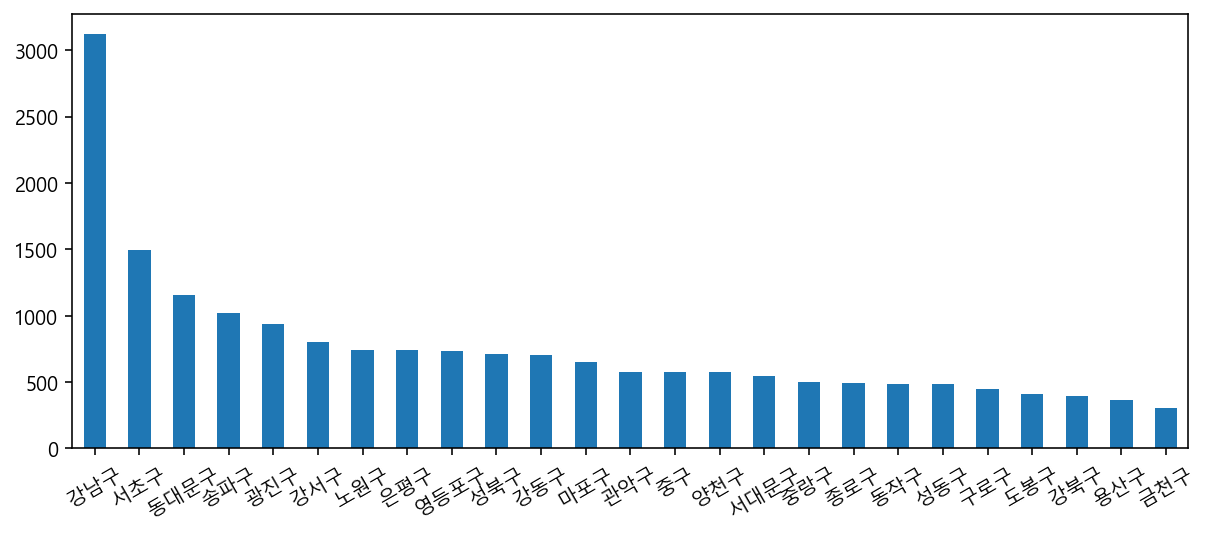

In [82]:
df_seoul["시군구명"].value_counts().plot.bar(figsize=(10,4), rot = 30)

<AxesSubplot:xlabel='시군구명', ylabel='count'>

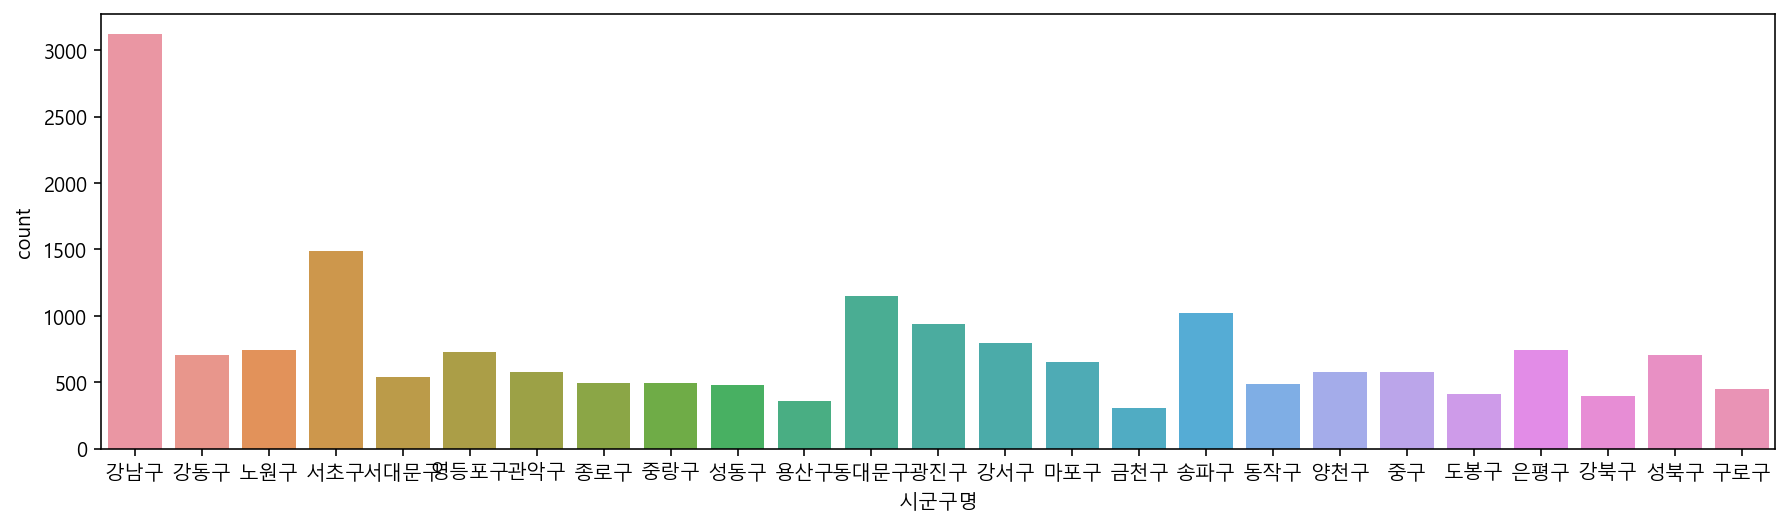

In [83]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_seoul,x="시군구명")

<AxesSubplot:xlabel='경도', ylabel='위도'>

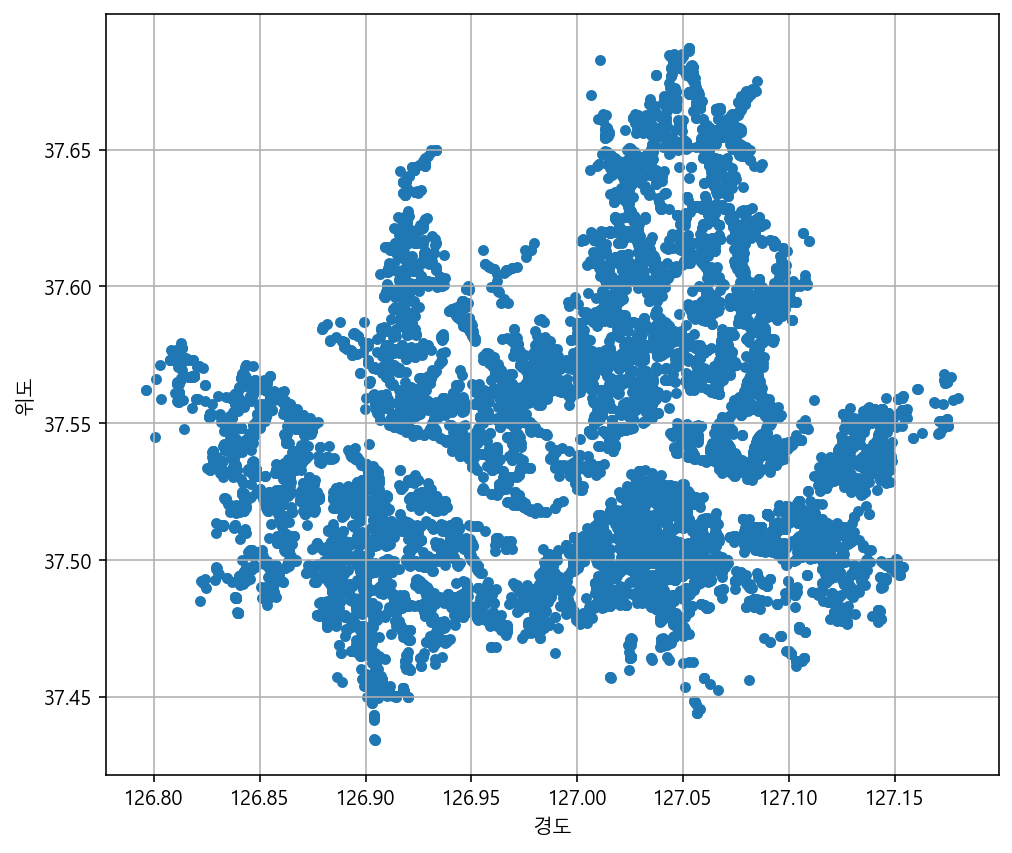

In [84]:
df_seoul[["경도","위도","시군구명"]].plot.scatter(x="경도",y="위도", figsize=(8,7), grid=True)

<AxesSubplot:xlabel='경도', ylabel='위도'>

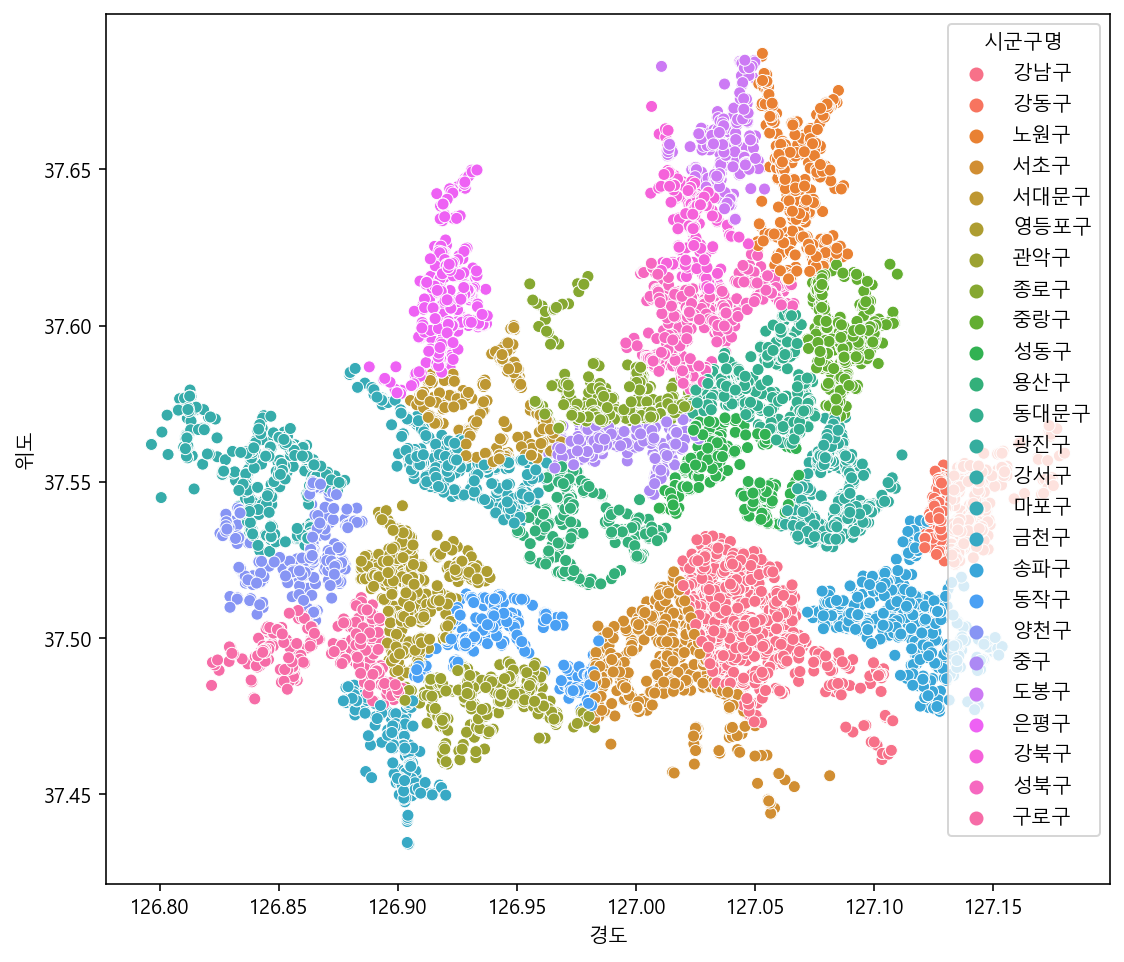

In [85]:
plt.figure(figsize=(9,8))
sns.scatterplot(data=df_seoul, x="경도",y="위도", hue="시군구명")

<AxesSubplot:xlabel='경도', ylabel='위도'>

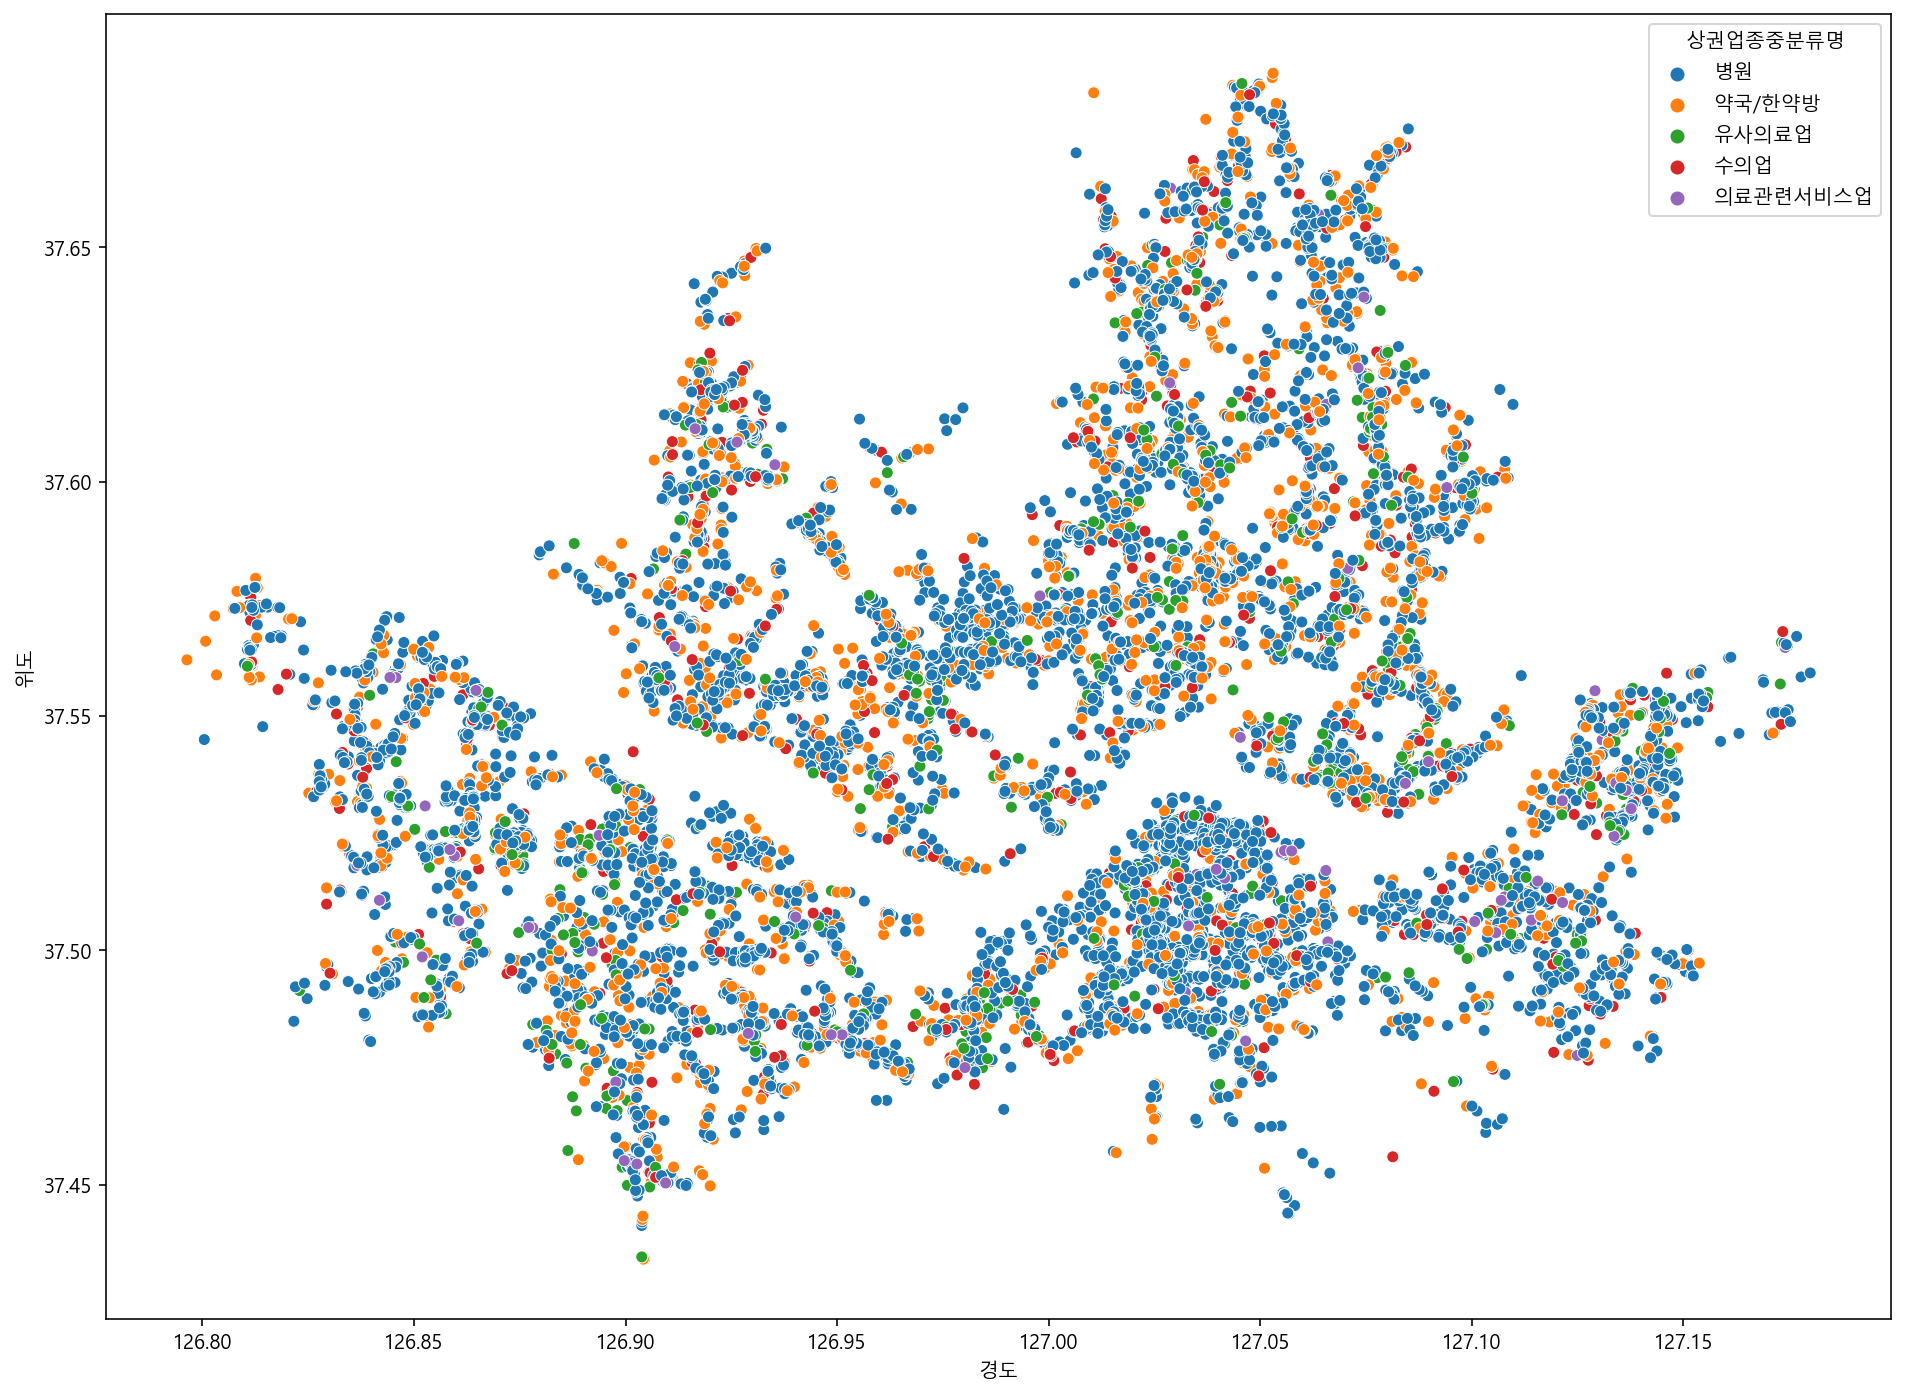

In [86]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=df_seoul, x="경도",y="위도", hue="상권업종중분류명")

<AxesSubplot:xlabel='경도', ylabel='위도'>

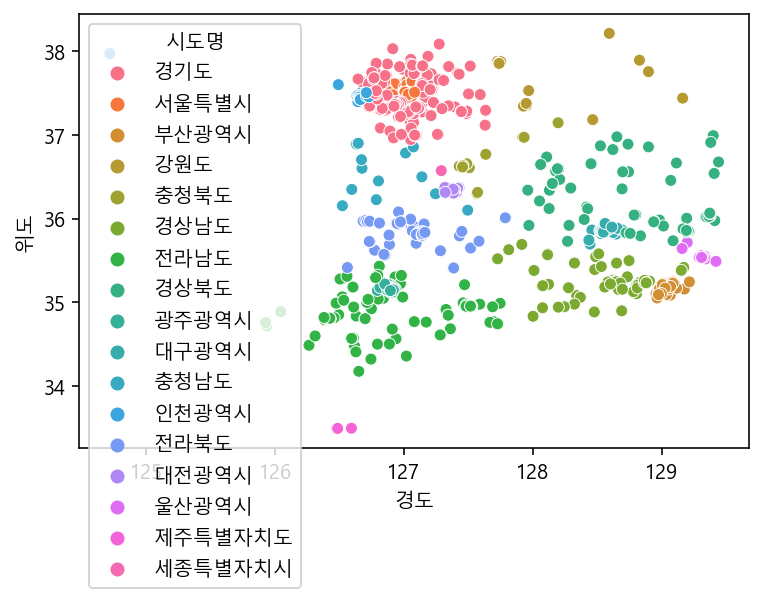

In [87]:
sns.scatterplot(data=df[:1000], x="경도",y="위도", hue="시도명")

<AxesSubplot:xlabel='경도', ylabel='위도'>

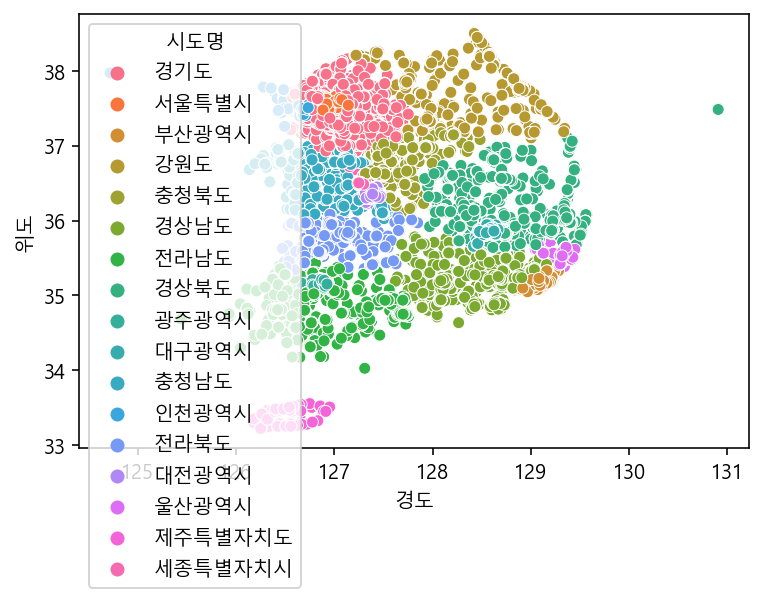

In [88]:
sns.scatterplot(data=df, x="경도",y="위도", hue="시도명")

### Folium으로 지도 활용하기
#### Folium 사용예제

In [89]:
import folium
m = folium.Map(location=[45.372, -122.6750])

In [90]:
m

In [91]:
m.save('index_html')

In [92]:
folium.Map(location=[45.5236, -122.6750],
          tiles='Stamen Toner',
          zoom_start=13)

In [93]:
m = folium.Map(location=[45.372,-121.6972],
              zoom_start=12,
              tiles="Stamen Terrain")

tooltip = 'Click mel'

folium.Marker([45.3288,-121.6625], popup='<i>Mt.Hood Meadows</i>', tooltip=tooltip).add_to(m)

folium.Marker([45.3311,-121.7113], popup='<b>Timberline Lodge</b>', tooltip=tooltip).add_to(m)
m

In [94]:
df_seoul_hospital["위도"].mean()
df_seoul_hospital["경도"].mean()

126.9963589356625

In [98]:
map = folium.Map(location=[df_seoul_hospital["위도"].mean(),
                     df_seoul_hospital["경도"].mean()],
          zoom_start=12)

In [115]:
for n in df_seoul_hospital.index:
    name = df_seoul_hospital.loc[n, "상호명"]
    address = df_seoul_hospital.loc[n, "도로명주소"]
    popup = f"{name}-{address}"
    location = [df_seoul_hospital.loc[n, "위도"],df_seoul_hospital.loc[n, "경도"]]
    folium.Marker(location = location,
                 popup = popup
                 ).add_to(map)
map

In [106]:
df_seoul_hospital.index

Int64Index([  305,   353,   385,  2461,  2687,  2801,  4285,  4856,  5005,
             5089,  5759,  5824,  5867,  6978,  8706,  9529, 10937, 10958,
            11314, 11834, 14133, 14928, 15521, 16678, 16844, 18818, 19102,
            19438, 19576, 21391, 23422, 24375, 25858, 25917, 26291, 27751,
            28248, 28262, 28539, 28997, 30648, 30919, 40342, 43078, 44681,
            49667, 50174, 51167, 54845, 56967, 59916, 61398, 61757, 71036,
            71991, 90492, 90581, 90788],
           dtype='int64')

### 자율주제를 세우고 직접 분석
+ 강남에는 피부과, 성형외과가 다른지역보다 많을까?

#### 데이터 색인하기

In [172]:
df.head(1)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
0,19956873,하나산부인과,S,의료,S01,병원,S01B10,산부인과,경기도,41273.0,...,경기도 안산시 단원구 선부동 1081,412733191011,경기도 안산시 단원구 달미로,10,4127310900110810000010857,경기도 안산시 단원구 달미로 10,425764.0,15236.0,126.814295,37.336344


In [178]:
df_skin = df[df["시도명"] == "서울특별시"]
df_skin.head(1)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
1,20024149,타워광명내과의원,S,의료,S01,병원,S01B07,내과/외과,서울특별시,11680.0,...,서울특별시 강남구 도곡동 467-14,116804166604,서울특별시 강남구 언주로30길,39,1168011800104670014000001,서울특별시 강남구 언주로30길 39,135270.0,6292.0,127.053198,37.488742


In [221]:
skin = df_skin[df_skin["상호명"].str.contains("피부과|성형외과")][["상호명","위도","경도","도로명주소"]]
skin["상호명"].value_counts()

차앤박피부과      6
미앤미피부과      4
후즈후피부과의원    3
오라클피부과      3
리뉴미피부과      3
           ..
신피부과의원      1
연세모네피부과     1
오라클피부과의원    1
원문섭피부과의원    1
이을성형외과의원    1
Name: 상호명, Length: 940, dtype: int64

In [230]:
m = folium.Map(location = [skin["위도"].mean(), skin["경도"].mean()],
              zoom_start=12)

for i in skin.index:
    name = skin.loc[i,"상호명"]
    address = skin.loc[i,"도로명주소"]
    popup = f"{name} - {address}"
    location = [skin.loc[i,"위도"],skin.loc[i,"경도"]]
    folium.Marker(location = location,
                 popup = popup
                 ).add_to(m)
# m